In [2]:
# importing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [5]:
# using train.csv for data
train_data = pd.read_csv('/content/titanic_data/train.csv')

# fill in null values
train_data["Age"].fillna(train_data["Age"].mean(), inplace = True)
train_data['Sex'] = train_data['Sex'].replace('male', 1)
train_data['Sex'] = train_data['Sex'].replace('female', 0)
train_data.drop(['Name', 'PassengerId', 'Fare', 'Ticket','Embarked', 'Cabin'], axis = 1, inplace = True)


In [6]:
# checking the data
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.000000,1,0
1,1,1,0,38.000000,1,0
2,1,3,0,26.000000,0,0
3,1,1,0,35.000000,1,0
4,0,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0
887,1,1,0,19.000000,0,0
888,0,3,0,29.699118,1,2
889,1,1,1,26.000000,0,0


In [7]:
# checking null
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [8]:
# standard scaling
def std_scale(data):
  result = []
  for x in data:
    result.append((x-np.mean(data))/np.std(data))
  return result

# scaling
X_scale = train_data[['Pclass','Sex','Age','SibSp','Parch']].apply(std_scale)

In [9]:
# splitting the dataset
Y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_scale, Y, test_size=0.20, random_state=101)

In [10]:
# acc list for later
accuracy_list = []

# iterating knn model from 1 to 30
for k in range(1,30):
  knn_model= KNeighborsClassifier(n_neighbors = k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

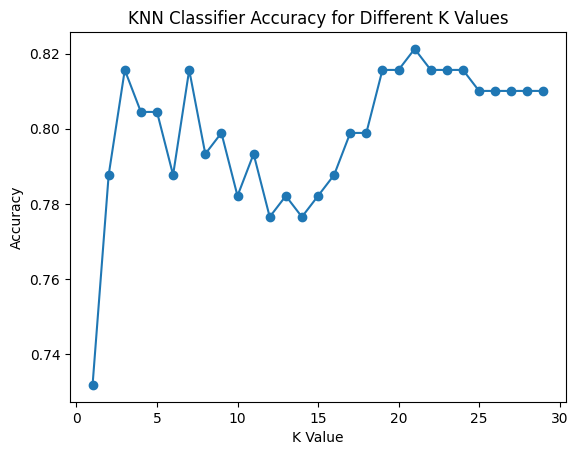

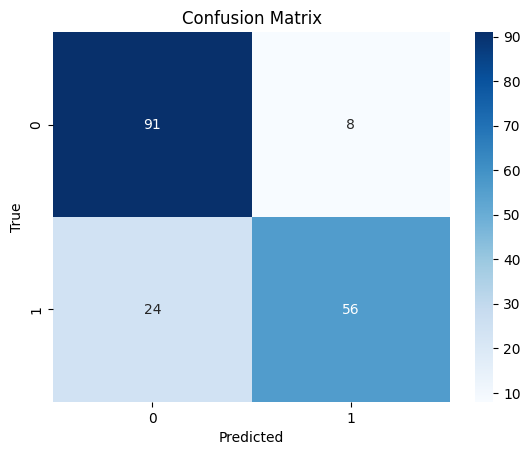

Final Accuracy: 82.12%
Mean Cross-Validation Score: 0.82264767
Standard Deviation of Cross-Validation Scores: 0.01634934


In [18]:
# plotting knn
plt.plot(range(1, 30), accuracy_list, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different K Values')
plt.show()

# finding best k to use
best_k = accuracy_list.index(max(accuracy_list)) + 1

# final knn model using k = 21
final_knn_model = KNeighborsClassifier(n_neighbors=best_k)
final_knn_model.fit(X_train, y_train)
y_pred_final = final_knn_model.predict(X_test)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# final accuracy
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Accuracy: {final_accuracy * 100:.2f}%")

# cross-validation reporting, cv = 5
cross_valid_scores = cross_val_score(final_knn_model, X_scale, Y, cv = 5)
mean_cv_score = np.mean(cross_valid_scores)
std_cv_score = np.std(cross_valid_scores)
print(f"Mean Cross-Validation Score: {mean_cv_score:.8f}")
print(f"Standard Deviation of Cross-Validation Scores: {std_cv_score:.8f}")